# Diamonds - Price Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
diamonds = pd.read_csv('../Data/diamonds_hist.csv')

In [13]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [7]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [89]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          1
z          1
dtype: int64

In [110]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I3' : 1
                }

In [111]:
cut_scale = {
            'Premium' : 5, 
            'Good' : 4, 
            'Very Good' : 3, 
            'Ideal' : 2, 
            'Fair' :1
            }

In [112]:
color_scale = {
                'D' : 1, 'E' : 2, 
                'F' : 3, 'G' : 4, 
                'H' : 5, 'I' : 6, 
                'J' : 7
                }

In [114]:
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)
diamonds['cut_scale'] = diamonds['cut'].map(cut_scale)

In [115]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,cut_scale,color_scale
count,13181.000000,13181.000000,13181.000000,13181.000000,13181.000000,13180.000000,13180.000000,13181.000000,13181.000000,13181.000000
mean,0.895974,61.836242,57.801259,3827.478568,6.097427,6.097878,3.768292,5.380548,3.250816,3.704120
std,0.256887,1.588080,2.275274,1383.536217,0.704496,0.692095,0.444348,1.418370,1.274377,1.769924
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
25%,0.760000,61.000000,56.000000,3183.000000,5.860000,5.870000,3.610000,4.000000,2.000000,2.000000
50%,0.960000,61.900000,58.000000,4059.000000,6.280000,6.270000,3.880000,5.000000,3.000000,4.000000
75%,1.040000,62.700000,59.000000,4811.000000,6.530000,6.520000,4.030000,6.000000,5.000000,5.000000
max,2.270000,71.800000,70.000000,5885.000000,8.480000,8.390000,5.430000,10.000000,5.000000,7.000000


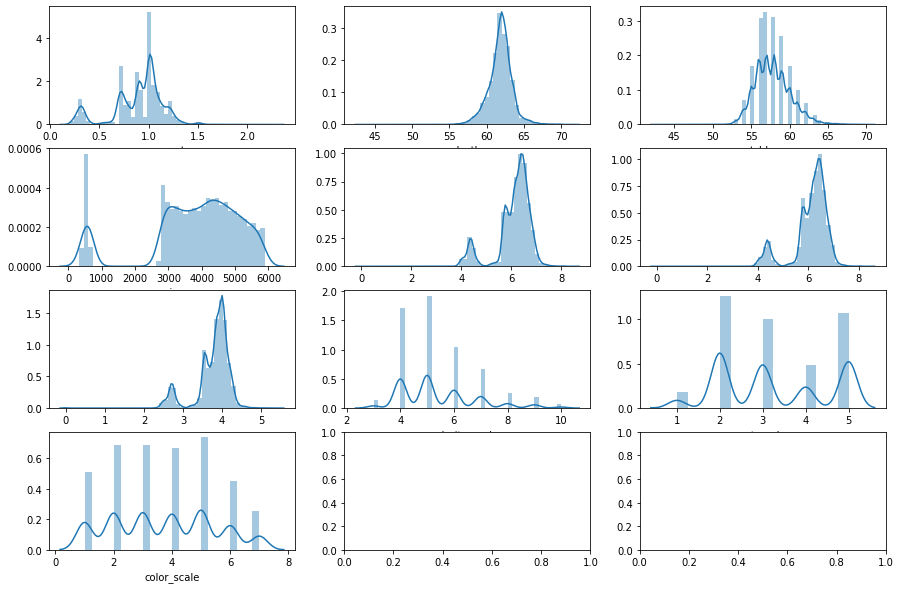

In [116]:
fig, ax = plt.subplots(4,3, figsize=(15,10))

sns.distplot(diamonds.carat, ax=ax[0][0])
sns.distplot(diamonds.depth, ax=ax[0][1])
sns.distplot(diamonds.table, ax=ax[0][2])
sns.distplot(diamonds.price, ax=ax[1][0])
sns.distplot(diamonds.x, ax=ax[1][1])
sns.distplot(diamonds.y, ax=ax[1][2])
sns.distplot(diamonds.z, ax=ax[2][0])
sns.distplot(diamonds.clarity_scale, ax=ax[2][1])
sns.distplot(diamonds.cut_scale, ax=ax[2][2])
sns.distplot(diamonds.color_scale, ax=ax[3][0]);

In [143]:
carat_range = diamonds['carat'].describe()

In [144]:
def caratrange(x):
    
    if x >= carat_range['min'] and x < carat_range['25%']:
        return 'bucket_1'
    elif x >= carat_range['25%'] and x < carat_range['50%']:
        return 'bucket_2'
    elif x >= carat_range['50%'] and x < carat_range['75%']:
        return 'bucket_3'
    elif x >= carat_range['75%'] and x <= 1.5 * carat_range['max']:
        return 'bucket_4'
    else:
        return 'undefined'

In [ ]:
bucket1 = diamonds.query('carat_range == "bucket_1"')
bucket2 = diamonds.query('carat_range == "bucket_2"')
bucket3 = diamonds.query('carat_range == "bucket_3"')

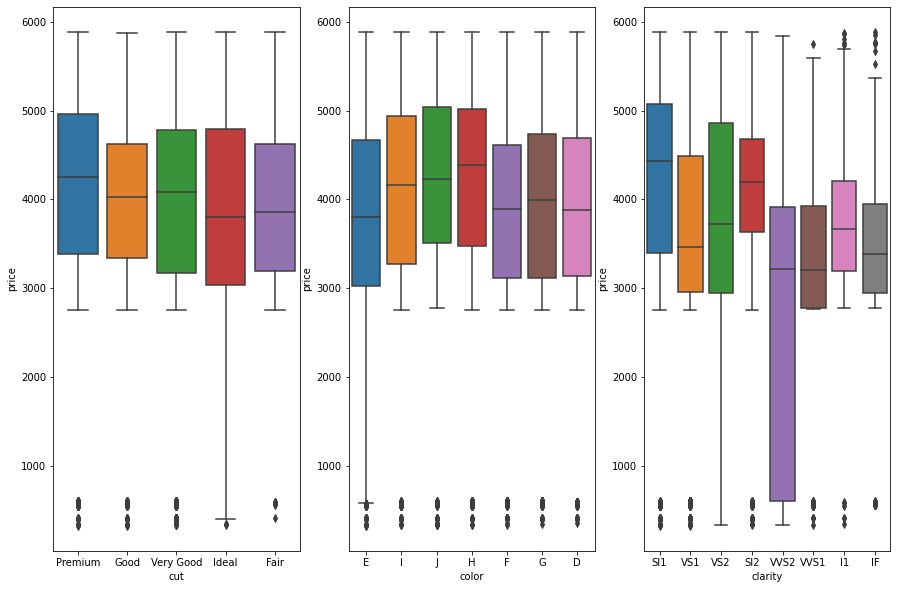

In [69]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(x='cut', y='price', data=diamonds, ax=ax[0])
sns.boxplot(x='color', y='price', data=diamonds, ax=ax[1])
sns.boxplot(x='clarity', y='price', data=diamonds, ax=ax[2]);

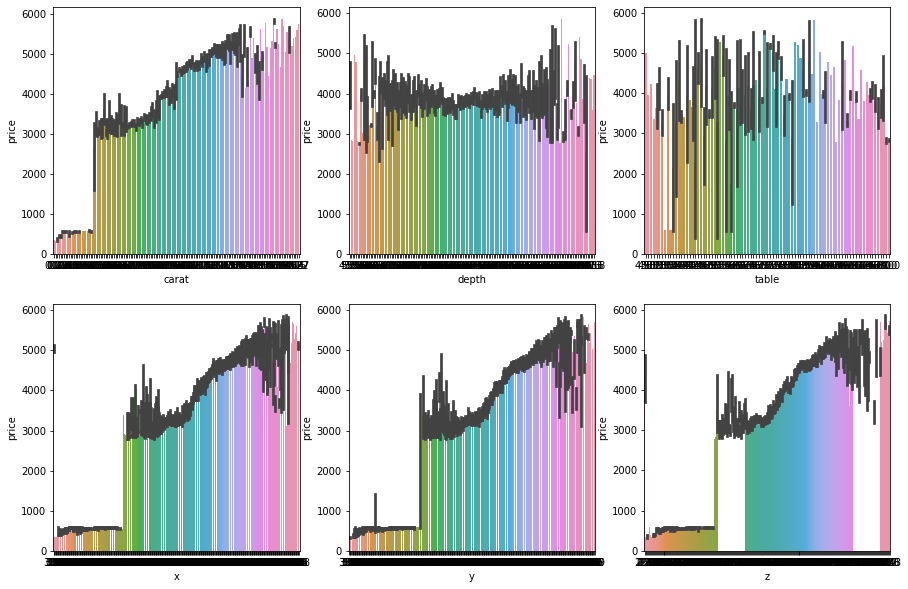

In [124]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.barplot(x=diamonds.carat, y=diamonds.price, ax=ax[0][0])
sns.barplot(x=diamonds.depth, y=diamonds.price, ax=ax[0][1])
sns.barplot(x=diamonds.table, y=diamonds.price, ax=ax[0][2])
sns.barplot(x=diamonds.x, y=diamonds.price, ax=ax[1][0])
sns.barplot(x=diamonds.y, y=diamonds.price, ax=ax[1][1])
sns.barplot(x=diamonds.z, y=diamonds.price, ax=ax[1][2]);

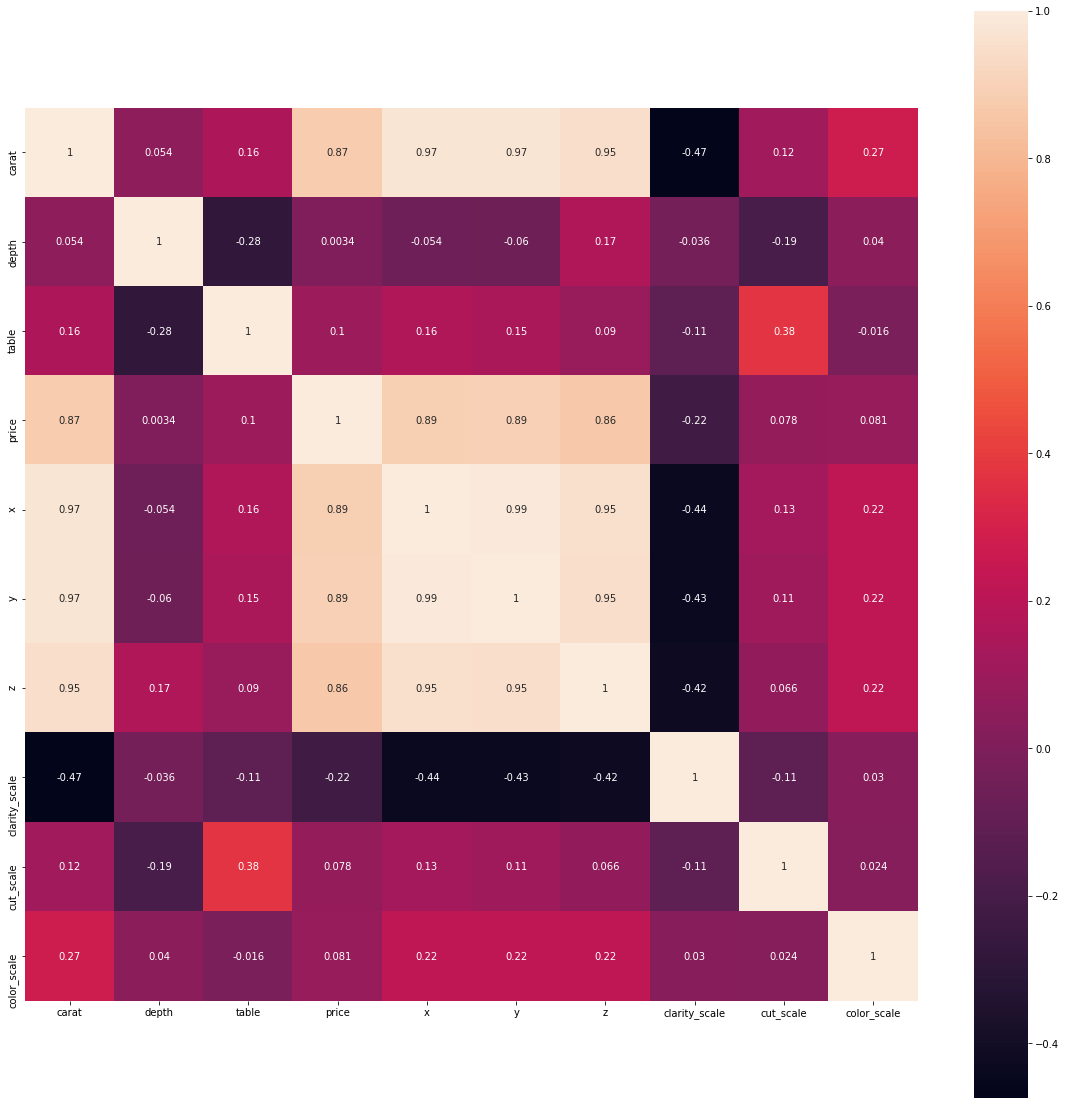

In [119]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

In [99]:
diamonds.kurtosis()

carat    0.982942
depth    5.261325
table    0.867479
price    0.683266
x        2.478347
y        2.217420
z        4.468450
dtype: float64

In [100]:
diamonds.skew()

carat   -0.809670
depth   -0.259262
table    0.571984
price   -1.038641
x       -1.505404
y       -1.506179
z       -1.673004
dtype: float64

## Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [121]:
model = LinearRegression()

X = di